In [2]:
import pandas as pd

In [3]:
data= 'https://github.com/nbennett4025/Data/raw/master/ballotinitiativesWA.xlsx'

In [4]:
ballot=pd.read_excel(data,0)
ballot.dtypes

Jurisdiction                         object
County                               object
Government Type                      object
Subject                              object
Ballot Measure Text                  object
Election Results                     object
Yes %                               float64
No %                                float64
Election Month                       object
Election Year                         int64
Duration in Years Levy/Fee           object
Amount of Levy (Per $1000 A/V)      float64
Tax Amount                          float64
Bond Amount                         float64
Funding Type/Statutory Authority     object
dtype: object

In [5]:
ballotyes=ballot['Yes %']

In [6]:
ballotyes.describe()

count    1434.000000
mean       62.784426
std        14.206475
min         0.000000
25%        54.750000
50%        64.575000
75%        72.442500
max       100.000000
Name: Yes %, dtype: float64

In [7]:
ballotyes.mean()

62.78442629009772

In [8]:
ballotyes.skew()

-0.64296411152460098

In [9]:
ballotyes.kurt()

0.88296249539900984

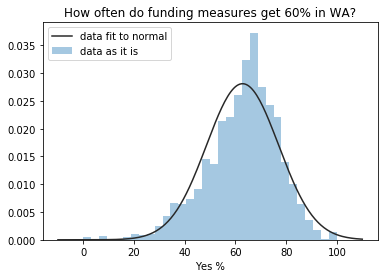

In [10]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(ballotyes.dropna(),kde=False,fit=norm)
plt.legend(('data fit to normal','data as it is'))
plt.title('How often do funding measures get 60% in WA?')
plt.show()

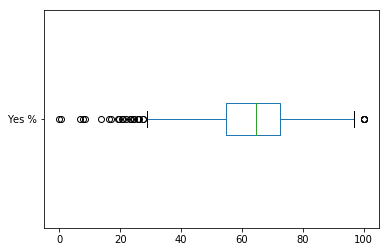

In [11]:
plot,dataBP=ballotyes.plot.box(vert=False,return_type='both')
plt.show()
#looks like the data have a longer left tail, but are generally close to being 
#'normal'. On average it seems like things get the required 60% about
# a little more than half of the time

In [12]:
#Moving on to bi-variate analysis
from scipy import stats

In [13]:
ballot['Government Type'].value_counts()

City                                      481
Fire Protection District                  425
Park District                             161
County                                    110
Cemetery District                          60
Public Hospital District                   58
Transportation Benefit District            40
Port District                              20
Emergency Medical Services District        16
Water-Sewer District                       14
Public Transportation Benefit Area         13
Library District                           13
Public Facilities District                  7
Solid Waste Disposal District               6
Mosquito Control District                   4
County Public Transportation Authority      2
Public Utility District                     2
Flood Control Zone District                 1
Regional Transit Authority                  1
Name: Government Type, dtype: int64

In [14]:
values = list(ballot['Government Type'].value_counts().index)
values


    

['City',
 'Fire Protection District',
 'Park District',
 'County',
 'Cemetery District',
 'Public Hospital District',
 'Transportation Benefit District',
 'Port District',
 'Emergency Medical Services District',
 'Water-Sewer District',
 'Public Transportation Benefit Area',
 'Library District',
 'Public Facilities District',
 'Solid Waste Disposal District',
 'Mosquito Control District',
 'County Public Transportation Authority',
 'Public Utility District',
 'Flood Control Zone District',
 'Regional Transit Authority']

In [15]:
city = values[0]
county = values[3]
govsimple = []

for value in ballot['Government Type']:
    if value in city:
        govsimple.append('City')
    else:
        if value in county:
            govsimple.append('County')
        else:
            govsimple.append('Special District')
    

In [16]:
ballot['govsimple'] = govsimple

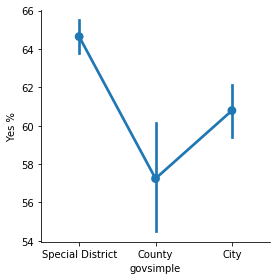

In [17]:
sns.factorplot(x='govsimple', y= 'Yes %', data=ballot)
plt.show()

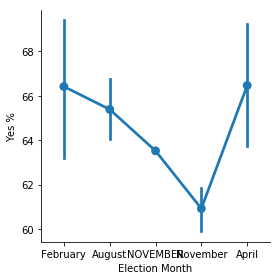

In [18]:
# it would seem that counties have a harder time passing funding than cities
# or special districts
#Does the month of the election matter?
sns.factorplot(x='Election Month', y= 'Yes %', data=ballot)
plt.show()

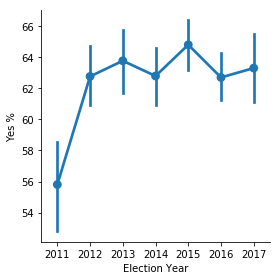

In [19]:
sns.factorplot(x='Election Year', y= 'Yes %', data=ballot)
plt.show()
#looks like 2011 was a bad year for funding

In [20]:
#looking a little closer
ballot['Election Year'].value_counts()

2016    252
2015    247
2017    213
2013    211
2012    205
2014    195
2011    111
Name: Election Year, dtype: int64

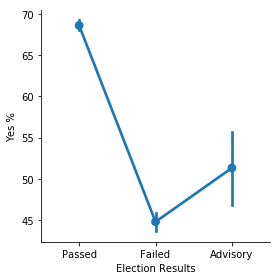

In [21]:
#now the dumb one
sns.factorplot(x='Election Results', y= 'Yes %', data=ballot)
plt.show()

In [22]:
#time for some correlations
ballot.dtypes

Jurisdiction                         object
County                               object
Government Type                      object
Subject                              object
Ballot Measure Text                  object
Election Results                     object
Yes %                               float64
No %                                float64
Election Month                       object
Election Year                         int64
Duration in Years Levy/Fee           object
Amount of Levy (Per $1000 A/V)      float64
Tax Amount                          float64
Bond Amount                         float64
Funding Type/Statutory Authority     object
govsimple                            object
dtype: object

In [23]:
yes = ballot['Yes %']
no = ballot['No %']
duration = ballot['Duration in Years Levy/Fee']
levy = ballot['Amount of Levy (Per $1000 A/V)']
tax = ballot['Tax Amount']
bond = ballot['Bond Amount']

In [24]:
data={'yes':yes, 'no':no, 'duration':duration, 'levy':levy, 'tax':tax, 'bond':bond}
data

{'bond': 0             NaN
 1             NaN
 2             NaN
 3             NaN
 4             NaN
 5             NaN
 6             NaN
 7             NaN
 8             NaN
 9             NaN
 10            NaN
 11            NaN
 12            NaN
 13            NaN
 14            NaN
 15            NaN
 16            NaN
 17            NaN
 18            NaN
 19            NaN
 20            NaN
 21            NaN
 22            NaN
 23            NaN
 24            NaN
 25            NaN
 26            NaN
 27            NaN
 28            NaN
 29            NaN
           ...    
 1404          NaN
 1405    3500000.0
 1406          NaN
 1407          NaN
 1408          NaN
 1409          NaN
 1410          NaN
 1411          NaN
 1412          NaN
 1413    7990000.0
 1414          NaN
 1415          NaN
 1416          NaN
 1417          NaN
 1418          NaN
 1419          NaN
 1420          NaN
 1421          NaN
 1422          NaN
 1423          NaN
 1424          NaN
 142

In [25]:
ballotcorr = pd.DataFrame.from_dict(data)
ballotcorr

,bond,duration,levy,no,tax,yes
0,NaN,6,NaN,37.17,0.0013,62.83
1,NaN,1,0.21,23.16,NaN,76.84
2,NaN,1,0.27,29.03,NaN,70.97
3,NaN,1,0.27,14.78,NaN,85.22
4,NaN,1,0.19,18.18,NaN,81.82
5,NaN,1,0.26,14.06,NaN,85.94
6,NaN,1,0.26,16.30,NaN,84.70
7,NaN,1,0.02,36.48,NaN,63.52
8,NaN,1,0.02,49.14,NaN,50.86
9,NaN,1,0.11,42.38,NaN,57.62


In [26]:
#looks like duration is going to be a problem so lets drop it as a variable
ballotcorr.drop('duration',axis=1,inplace=True)

In [27]:
ballotcorr

,bond,levy,no,tax,yes
0,NaN,NaN,37.17,0.0013,62.83
1,NaN,0.21,23.16,NaN,76.84
2,NaN,0.27,29.03,NaN,70.97
3,NaN,0.27,14.78,NaN,85.22
4,NaN,0.19,18.18,NaN,81.82
5,NaN,0.26,14.06,NaN,85.94
6,NaN,0.26,16.30,NaN,84.70
7,NaN,0.02,36.48,NaN,63.52
8,NaN,0.02,49.14,NaN,50.86
9,NaN,0.11,42.38,NaN,57.62


In [28]:
ballotcorr.corr('pearson', 1)

,bond,levy,no,tax,yes
bond,1.000000,NaN,-0.075546,NaN,0.075543
levy,NaN,1.000000,0.141061,-1.000000,-0.137931
no,-0.075546,0.141061,1.000000,-0.254060,-0.979699
tax,NaN,-1.000000,-0.254060,1.000000,0.254068
yes,0.075543,-0.137931,-0.979699,0.254068,1.000000


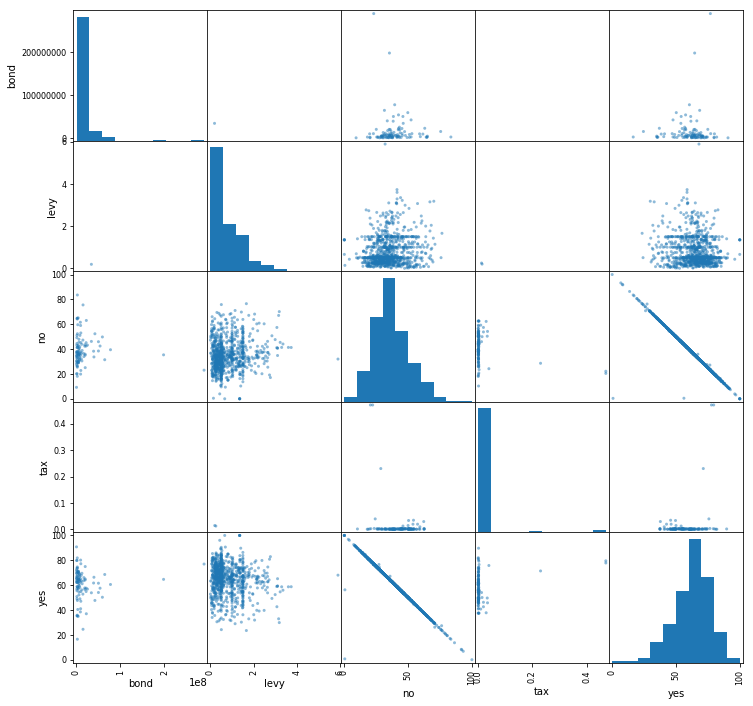

In [29]:
pd.plotting.scatter_matrix(ballotcorr,figsize=(12,12))
plt.show()

In [30]:
# alright it looks like only certain types of funding respond at all to the amount being asked for

In [31]:
#in order to have a good regression we need to turn some variables into dummy variables

In [32]:
ballot['Subject'].value_counts()

EMS                                                                    214
Parks and Recreation                                                   200
Fire                                                                   190
Transportation                                                         134
Other                                                                  117
Government Organization                                                115
Fire, EMS                                                              114
Cemetery                                                                60
Criminal Justice                                                        55
Hospital                                                                44
Annexation, Fire                                                        32
Library                                                                 32
Water and Sewer                                                         23
Annexation               

In [33]:
import numpy as np
subjects = list(ballot['Subject'].value_counts().index)
subjects

['EMS',
 'Parks and Recreation',
 'Fire',
 'Transportation',
 'Other',
 'Government Organization',
 'Fire, EMS',
 'Cemetery',
 'Criminal Justice',
 'Hospital',
 'Annexation, Fire',
 'Library',
 'Water and Sewer',
 'Annexation',
 'Criminal Justice, Fire',
 'Annexation, Library',
 'Transportation, Water and Sewer, Other',
 'Government Organization, Fire',
 'Affordable Housing',
 'Annexation, Transportation',
 'Criminal Justice, Other',
 'Transportation, Criminal Justice',
 'Fire, Other',
 'Human Services',
 'Fire, EMS, Criminal Justice',
 'Criminal Justice, Fire, Parks and Recreation, Other',
 'Parks and Recreation, Other',
 'Criminal Justice, Parks and Recreation, Other',
 'Transportation, Parks and Recreation',
 'Fire, Parks and Recreation, Other',
 'Criminal Justice, Library, Parks and Recreation, Other',
 'Criminal Justice, Parks and Recreation',
 'Criminal Justice, Human Services',
 'Fire, EMS, Transportation, Criminal Justice, Other',
 'Government Organization, Criminal Justice',
 

In [34]:
parks = subjects[1]
transit = subjects[3]
govorg =subjects[5]
cemetery=subjects[7]
other=subjects[4]
water=subjects[12]
publicsafety = ['EMS', 'Fire', 'Fire, EMS', 'Criminal Justice']
human = ['Hospital', 'Library', 'Affordable Housing', 'Human Services']
annexation = ['Annexation, Fire', 'Annexation', 'Annexation, Library', 'Annexation, Transportation', 'Annexation, Water-Sewer']





In [35]:
parks

'Parks and Recreation'

In [36]:
subsimple = []
for value in ballot['Subject']:
    if value in parks:
        subsimple.append('Parks')
    else:
        if value in transit:
            subsimple.append('Transit')
        else:
            if value in govorg:
                subsimple.append('Government Organization')
            else: 
                if value in cemetery:
                    subsimple.append('Cemetery')
                else:
                    if value in water:
                        subsimple.append('Water/Sewer')
                    else:
                        if value in other:
                            subsimple.append('Other')
                        else:
                            if value in publicsafety:
                                subsimple.append('Public Safety')
                            else:
                                if value in human:
                                    subsimple.append('Human Services')
                                else:
                                    if value in annexation:
                                        subsimple.append('Annexation')
                                    else:
                                        subsimple.append('Multiple')
                                
                            


In [37]:
ballot['subsimple'] = subsimple
ballot

,Jurisdiction,County,Government Type,Subject,Ballot Measure Text,Election Results,Yes %,No %,Election Month,Election Year,Duration in Years Levy/Fee,Amount of Levy (Per $1000 A/V),Tax Amount,Bond Amount,Funding Type/Statutory Authority,govsimple,subsimple
0,Aberdeen Transportation Benefit District,Grays Harbor,Transportation Benefit District,Transportation,"TBD sales tax (6 years, 0.13%) for transportat...",Passed,62.83,37.17,February,2013,6,NaN,0.0013,NaN,Transportation Benefit District Sales Tax (RCW...,Special District,Transit
1,Adams County Cemetery District No. 1 - Washtuc...,Adams,Cemetery District,Cemetery,Excess levy ($0.21) for cemetery maintenance a...,Passed,76.84,23.16,August,2017,1,0.21,NaN,NaN,"Excess Levy (RCW 84.52.052, RCW 84.52.054)",Special District,Cemetery
2,Adams County Cemetery District No. 1 - Washtuc...,Adams,Cemetery District,Cemetery,Excess levy ($0.27) for cemetery maintenance a...,Passed,70.97,29.03,August,2016,1,0.27,NaN,NaN,"Excess Levy (RCW 84.52.052, RCW 84.52.054)",Special District,Cemetery
3,Adams County Cemetery District No. 1 - Washtuc...,Adams,Cemetery District,Cemetery,Excess levy ($0.27) for cemetery maintenance a...,Passed,85.22,14.78,August,2015,1,0.27,NaN,NaN,"Excess Levy (RCW 84.52.052, RCW 84.52.054)",Special District,Cemetery
4,Adams County Cemetery District No. 1 - Washtuc...,Adams,Cemetery District,Cemetery,Excess levy ($0.19) for cemetery maintenance a...,Passed,81.82,18.18,August,2014,1,0.19,NaN,NaN,"Excess Levy (RCW 84.52.052, RCW 84.52.054)",Special District,Cemetery
5,Adams County Cemetery District No. 1 - Washtuc...,Adams,Cemetery District,Cemetery,Excess levy ($0.26) for cemetery maintenance a...,Passed,85.94,14.06,August,2013,1,0.26,NaN,NaN,"Excess Levy (RCW 84.52.052, RCW 84.52.054)",Special District,Cemetery
6,Adams County Cemetery District No. 1 - Washtuc...,Adams,Cemetery District,Cemetery,Excess levy ($0.26) for cemetery maintenance a...,Passed,84.70,16.30,August,2012,1,0.26,NaN,NaN,"Excess Levy (RCW 84.52.052, RCW 84.52.054)",Special District,Cemetery
7,Adams County Cemetery District No. 2 - Othello,Adams,Cemetery District,Cemetery,Excess levy ($0.02) for cemetery maintenance a...,Failed,63.52,36.48,NOVEMBER,2017,1,0.02,NaN,NaN,"Excess Levy (RCW 84.52.052, RCW 84.52.054)",Special District,Cemetery
8,Adams County Cemetery District No. 2 - Othello,Adams,Cemetery District,Cemetery,Excess levy ($0.02) for cemetery maintenance a...,Failed,50.86,49.14,November,2016,1,0.02,NaN,NaN,"Excess Levy (RCW 84.52.052, RCW 84.52.054)",Special District,Cemetery
9,Adams County Cemetery District No. 3 - Lind Ce...,Adams,Cemetery District,Cemetery,Excess levy ($0.11) for cemetery maintenance a...,Failed,57.62,42.38,November,2017,1,0.11,NaN,NaN,"Excess Levy (RCW 84.52.052, RCW 84.52.054)",Special District,Cemetery


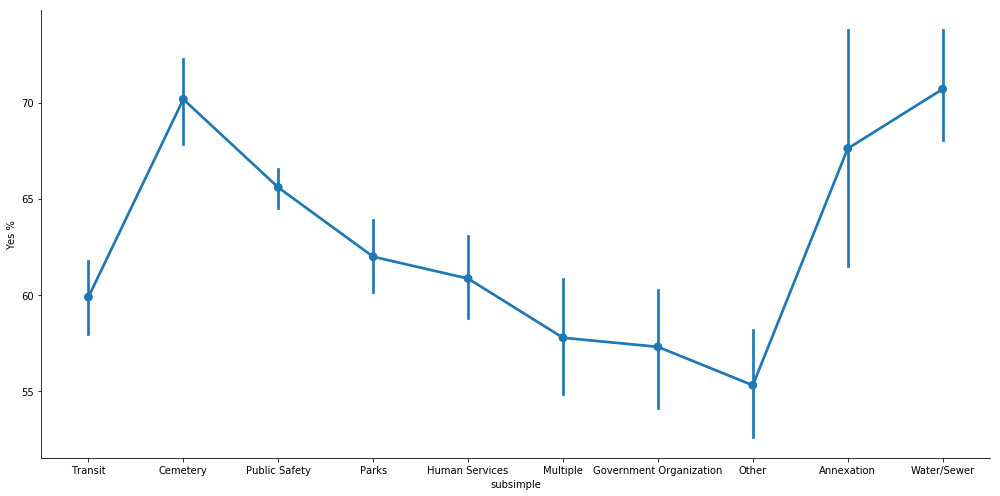

In [52]:
sns.factorplot(x='subsimple', y= 'Yes %', data=ballot,size=7,aspect=2)
plt.show()

In [38]:
ballot['subsimple'].value_counts()

Public Safety              573
Parks                      200
Transit                    134
Other                      117
Government Organization    115
Human Services              84
Multiple                    64
Annexation                  64
Cemetery                    60
Water/Sewer                 23
Name: subsimple, dtype: int64

In [39]:
#dummy recodes
#1 - election month
months = list(ballot['Election Month'].value_counts().index)
months

['November', 'August', 'February', 'April', 'NOVEMBER']

In [40]:
november = months[0]
august = months[1]
february = months[2]
april = months[3]
novembercap = months[4]

isnovember = []
for value in ballot['Election Month']:
    if value in november or novembercap:
        isnovember.append(1)
    else:
        isnovember.append(0)

ballot['isnovember'] = isnovember

isaugust =[]
for value in ballot['Election Month']:
    if value in august:
        isaugust.append(1)
    else:
        isaugust.append(0)

ballot['isaugust'] = isaugust

isfebruary =[]
for value in ballot['Election Month']:
    if value in february:
        isfebruary.append(1)
    else:
        isfebruary.append(0)

ballot['isfebruary'] = isfebruary

isapril =[]
for value in ballot['Election Month']:
    if value in april:
        isapril.append(1)
    else:
        isapril.append(0)

ballot['isapril'] = isapril

In [41]:
#recoding election results as a dummy variable
result = list(ballot['Election Results'].value_counts().index)
result


['Passed', 'Failed', 'Advisory']

In [42]:
passing=result[0]
failing=result[1]
passed=[]
for value in ballot['Election Results']:
    if value in passing:
        passed.append(1)
    else:
        if value in failing:
            passed.append(0)
        else:
            passed.append(None)
            
ballot['passed']=passed


In [43]:
ballot['levy']=ballot['Amount of Levy (Per $1000 A/V)']

In [44]:
ballot.dtypes

Jurisdiction                         object
County                               object
Government Type                      object
Subject                              object
Ballot Measure Text                  object
Election Results                     object
Yes %                               float64
No %                                float64
Election Month                       object
Election Year                         int64
Duration in Years Levy/Fee           object
Amount of Levy (Per $1000 A/V)      float64
Tax Amount                          float64
Bond Amount                         float64
Funding Type/Statutory Authority     object
govsimple                            object
subsimple                            object
isnovember                            int64
isaugust                              int64
isfebruary                            int64
isapril                               int64
passed                              float64
levy                            

In [45]:
#now that the relavent variables are ready lets see if the x's are correlated
xvars = ballot.columns[[19,20,21,22]]
ballot[xvars].corr()

,isfebruary,isapril,passed,levy
isfebruary,1.000000,-0.084309,0.069492,0.036321
isapril,-0.084309,1.000000,0.034492,-0.071166
passed,0.069492,0.034492,1.000000,-0.061768
levy,0.036321,-0.071166,-0.061768,1.000000


In [53]:
#looks like we are in the clear, lets run the regression on 'passed'
import statsmodels.formula.api as smf
formulalevy='passed ~ levy + isaugust + isfebruary + isapril'
levylogit = smf.ols(formulalevy,data=ballot).fit()
print(levylogit.summary())

                            OLS Regression Results                            
Dep. Variable:                 passed   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     8.985
Date:                Tue, 06 Mar 2018   Prob (F-statistic):           4.10e-07
Time:                        07:58:08   Log-Likelihood:                -407.80
No. Observations:                 887   AIC:                             825.6
Df Residuals:                     882   BIC:                             849.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7832      0.023     34.384      0.0

In [55]:
#Moving along to clustering
#first step is to find a unique unit
len(ballot['Ballot Measure Text'].unique())==len(ballot['Ballot Measure Text'])

False

In [58]:
import geopandas as gpd

In [65]:
compressedmap = 'https://github.com/nbennett4025/Data/raw/master/shapefile.shp'

In [66]:
countymap = gpd.GeoDataFrame.from_file(compressedmap)

OSError: no such file or directory: 'github.com/nbennett4025/Data/raw/master/shapefile.shp'